# Milestone 1
## 1.Introduction
`Fachmi Maris`

Batch 002

### Source Dataset :
https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### Objectives
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

### Konteks
Pelanggan churn adalah masalah mendasar bagi industri telekomunikasi (Telco). Ini didefinisikan sebagai hilangnya pelanggan yang berpindah dari satu operator Telco ke operator lainnya. Jika churn pelanggan dapat diprediksi sebelumnya, seperti "apakah pelanggan ini akan meninggalkan kita dalam X bulan ke depan?", Operator telekomunikasi dapat menerapkan kebijakan pemasaran bisnis kepada pelanggan churn tersebut untuk mempertahankan dan meningkatkan basis pelanggan. Secara khusus, mengingat jutaan pelanggan Telco, bahkan mengurangi tingkat churn 1% akan menghasilkan peningkatan laba yang signifikan.

"Memprediksi perilaku untuk mempertahankan pelanggan. Anda dapat menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan yang terfokus." [Kumpulan Data Sampel IBM]

### Konten
Setiap baris mewakili pelanggan, setiap kolom berisi atribut pelanggan yang dijelaskan pada kolom Metadata.

Kumpulan data mencakup informasi tentang:

- Pelanggan yang keluar dalam sebulan terakhir – kolomnya disebut Churn
- Layanan yang telah didaftarkan oleh setiap pelanggan – telepon, banyak saluran, internet, keamanan online, pencadangan online, perlindungan perangkat, dukungan teknis, dan streaming TV dan film
- Informasi akun pelanggan – berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, biaya bulanan, dan biaya total
- Info demografis tentang pelanggan – jenis kelamin, rentang usia, dan jika mereka memiliki pasangan dan tanggungan

## 2.Import Library

In [1]:
# Define Librearies
import numpy as np
import pandas as pd
from scipy import stats
#For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
# For Modeling Artificial Neural Network
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split
# For Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipe
# For Selection Features
from sklearn.feature_selection import f_classif, SelectKBest, chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
#For Model Evaluation
from sklearn.metrics import confusion_matrix ,accuracy_score
#Saving Model
import pickle
from sklearn import set_config
import warnings
warnings.filterwarnings("ignore")

## 3.Data Loading

Loading dataset into Visual Studio Code

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Kode di atas untuk memanggil dataset yang tellah ditentukan dan variabel diberi nama df

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Menampilkan 5 baris pertama pada dataframe

In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Menampilkan 5 baris terakhir pada dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan fungsi info di atas, dapat diketahui bahwa pada dataset ini terdiri dari Data type object, int64, dan float. Dataset terdiri dari 7043 baris dan 21 kolom. 
- Terdapat 3 kolom yang termasuk kolom numerikal yaitu `tenure` ,`MonthlyCharges` dan `TotalCharges` selebihnya adalah kolom kategorik
- kolom `TotalCharges` memiliki tipe data data yang salah pada dataframe sehingga akan diubah. Seharusnya kolom ini bersifat interjer namun ada sepertinya ada kesalahan teknis pada dataset.
- Kolom `Senior Citizen` merupakan hasil encoding sehingga data yang terbaca adalah interjer. 
- Kolom `Churn` merupakan kolom target yang masih bersifat object

In [6]:
df[df.duplicated()].shape

(0, 21)

Tidak ditemukan data terduplikat

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ditemukan missing values

In [8]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 7043 ,and number of columns are : 21


In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

kode di atas memberi informasi berapa jenis unique di setiap kolom.

In [10]:
def cat_unique_col_values(df):
    for column in df :
        if df[column].dtypes=="object" :
            print(f'{column}: {df[column].unique()}')

In [11]:
cat_unique_col_values(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


Informasi di atas adalah unique value dari setiap kolom yang bersifat object.

- Terlihat kolom `TotalCharge` harusnya bersifat numeric sehingga pada tahap selanjutnya akan diubah menjadi numeric.
- Terdapat unique `No phone sevice` dan `No internet Service` yang memiliki makna seperti `No`

Berdasarkan Peninjauan awal, Diperoleh informasi :
- Tidak ditemukan data terduplikat
- Tidak ditemukan missing values
- Kolom `customer ID` akan di drop karena bersifat seperti indeks
- Unique value `No phone sevice` dan `No internet Service` dapat diubah menjadi `No`. Pergantian values dilakukan karena memiliki makna yang sama


### Data Cleaning

In [12]:
#duplicated data
df_clean = df.copy()
df_clean.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Melakukan duplikasi dataframe agar tidak mengubah dataset dari sumber.

In [285]:
df_clean.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,No
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No,No,No,No,No,Yes,Yes,No,Yes,No,...,No,Yes,No,No,No,Yes,Yes,No,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,No,Yes
OnlineBackup,Yes,No,Yes,No,No,No,Yes,No,No,Yes,...,No,Yes,No,Yes,No,No,Yes,No,No,No


Drop kolom customer ID karena kolom ini bersifat seperti index dan tidak akan digunakan dalam pemodelan.

In [13]:
df_clean=df_clean.drop('customerID',axis=1)

Mengubah tipe data dari kolom `TotalCharges` dari dtype object menjadi tipe data numerik. Hal ini dilakukan karena unique value pada kolom ini berisi total biaya yang harus dibayar client.  

In [14]:
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'],errors='coerce')

Mengubah value pada kolom `SeniorCitizen`

In [15]:
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].replace(0, 'No')
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].replace(1, 'Yes')

Mengubah value pada kolom target `Churn` agar pengolahan data lebih efektif dan efisien tanpa harus melakukan encode saat training

In [16]:
df_clean['Churn'] = df_clean['Churn'].replace('No', 0)
df_clean['Churn'] = df_clean['Churn'].replace('Yes', 1)

Memeriksa missing values pada df_clean setelah melakukan langkah-langkah di atas

In [17]:
df_clean.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dari data di atas, terdapat missing values sebanyak 11 data pada kolom `TotalCharges` yang akan dihandling pada langkah berikutnya

Handling missing values di kolom `TotalCharges` dengan fillna 

In [18]:
df_clean['TotalCharges'].skew()

0.961642499724251

skew pada kolom TotalCharges adalah menunjukan kolom tersebut skewness positif sehingga missing values akan diisi dengan values median pada kolom tersebut

In [19]:
df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median(), inplace=True)

Unique value `No phone sevice` dan `No internet Service` diubah menjadi `No`. Pergantian value dilakukan karena value tersebut mengartikan hal yang sama.

In [20]:
df_clean.replace('No internet service','No',inplace=True)
df_clean.replace('No phone service','No',inplace=True)

In [21]:
df_clean[df_clean.duplicated()].shape

(22, 20)

Ditemukan 22 data duplikat pada variabel df_clean. Data ini akan dihapus dengan fungsi dropna

In [22]:
df_clean.drop_duplicates(inplace=True)

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


Berdasarkan informasi di atas, setelah dilakukan proses cleaning, dataset terdiri dari 7021 baris dan 20 kolom. 3 kolom bersifat numerikal dan 17 kolom bersifat kategori.

In [24]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Dictionary every columns :
- `CustomerID`: ID unik yang mengidentifikasi setiap pelanggan.
- `Gender`: Jenis kelamin pelanggan: : Male, Female
- `Age` : Usia pelanggan saat ini, dalam tahun, pada saat kuartal fiskal berakhir.
- `Senior Citizen`: Menunjukkan jika pelanggan berusia 65 tahun ke atas: Yes, No
- `Married (Partner)`: Menandakan jika nasabah sudah menikah: Yes, No
- `Dependents` : Menandakan jika pelanggan tinggal dengan salah satu tanggungan: Yes, No. Tanggungan dapat berupa anak-anak, orang tua, kakek-nenek, dll.
- `Tenure`: Mengindikasikan jumlah total bulan pelanggan telah bersama perusahaan.
- `Phone Service` : Menandakan jika pelanggan berlangganan layanan telepon rumah dengan perusahaan: Yes, No
- `Multiple Lines`: Mengindikasikan jika pelanggan berlangganan beberapa saluran telepon dengan perusahaan: Yes, No
- `Internet Service` : Menandakan jika pelanggan berlangganan layanan Internet dengan perusahaan: No, DSL, Fiber Optic, Cable.
- `Online Security`:Mengindikasikan jika pelanggan berlangganan layanan keamanan online tambahan yang disediakan oleh perusahaan: Yes, No
- `Online Backup`: Menunjukkan jika pelanggan berlangganan layanan pencadangan online tambahan yang disediakan oleh perusahaan: Yes, No
- `Device Protection Plan`:Mengindikasikan jika pelanggan berlangganan rencana perlindungan perangkat tambahan untuk peralatan Internet mereka yang disediakan oleh perusahaan: Yes, No
- `Tech Support` : Mengindikasikan jika pelanggan berlangganan paket dukungan teknis tambahan dari perusahaan dengan waktu tunggu yang dikurangi: Yes, No
- `Streaming TV` : Mengindikasikan jika pelanggan menggunakan layanan Internet mereka untuk mengalirkan program televisi dari penyedia pihak ketiga: Yes, No. The Perusahaan tidak membebankan biaya tambahan untuk layanan ini.
- `Streaming Movies`: Mengindikasikan jika pelanggan menggunakan layanan Internet mereka untuk melakukan streaming film dari penyedia pihak ketiga: Yes, No. Perusahaan tidak membebankan biaya tambahan untuk layanan ini.
- `Contract`: Mengindikasikan jenis kontrak pelanggan saat ini.
- `Paperless Billing`: Menandakan jika pelanggan telah memilih tagihan nirkertas: Yes, No
- `Payment Method`: Menunjukkan bagaimana pelanggan membayar tagihan mereka: Bank Withdrawal, Credit Card, Mailed Check
- `Monthly Charge`: Menunjukkan total biaya bulanan pelanggan saat ini untuk semua layanan mereka dari perusahaan.
- `Total Charges`: Mengindikasikan total tagihan pelanggan, dihitung hingga akhir kuartal yang ditentukan di atas.

- `Churn`: Yes = pelanggan meninggalkan perusahaan pada kuartal ini. No = pelanggan tetap bersama perusahaan. Terkait langsung dengan Nilai Churn

In [25]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','Churn']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [26]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [27]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

## 4.Exploratory Data Analysis (EDA) 

### EDA for Analysis Purpose

In [28]:
df_clean["Churn"].value_counts().reset_index()

,index,Churn
0,0,5164
1,1,1857


<AxesSubplot:>

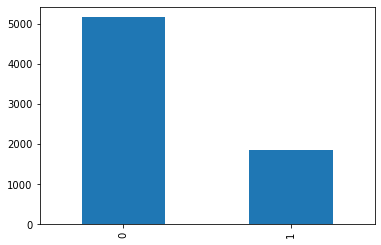

In [29]:
df_clean["Churn"].value_counts().plot(kind = "bar")

Client churn adalah client berhenti melakukan bisnis dengan perusahaan atau layanan. Dalam penelitian ini client yang dimaksud adalah client Telco industry.
Berdasarkan visualisasi di atas, diketahui bahwa jumlah client tidak churn (kelas=0) lebih banyak dibandingkan dengan client churn (kelas=1). Meskipun demikian, persentase client churn rate mencapai 26% angka yang besar dalam bisnis industri telekomunikasi. 

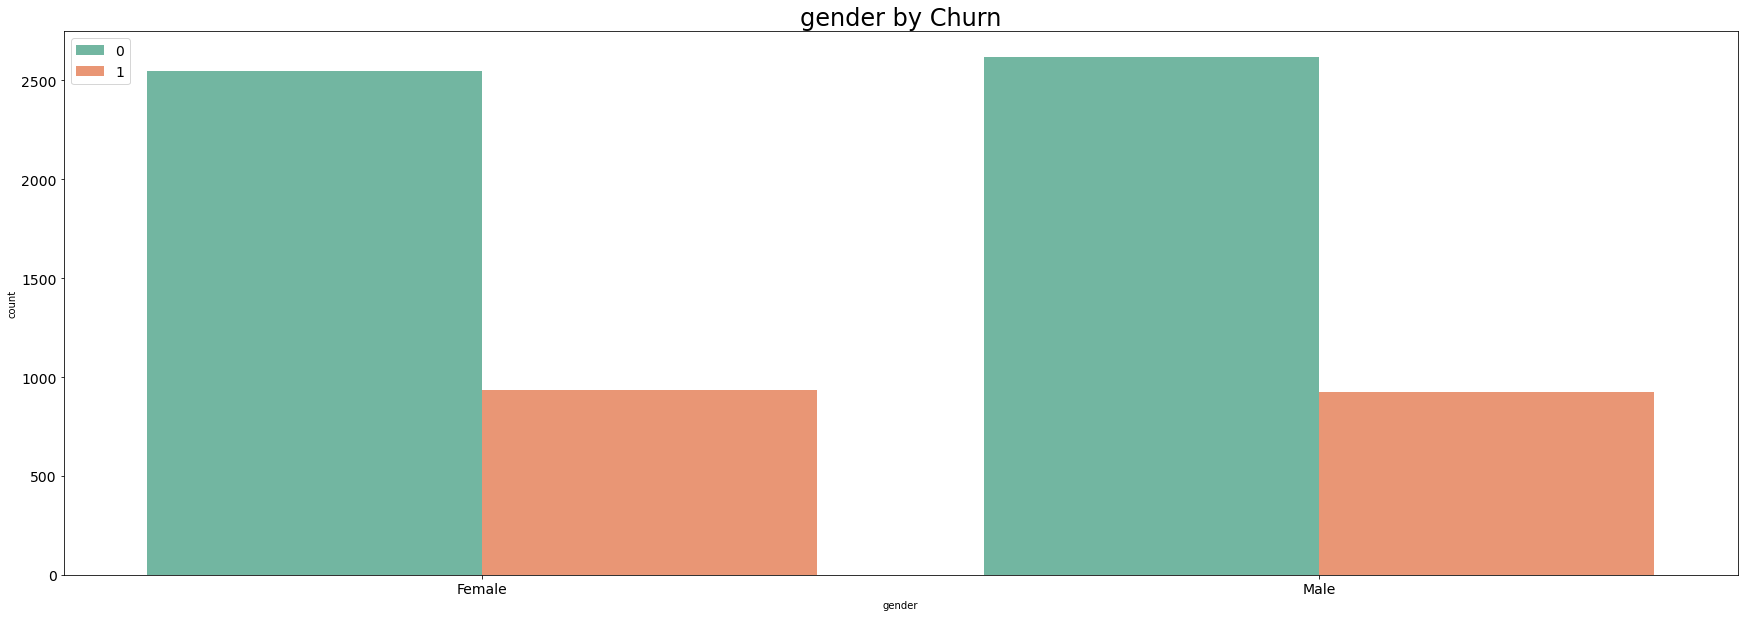

In [30]:
plt.figure(figsize = (30,10))
plt.title('gender by Churn', fontsize=24)
sns.countplot(data=df_clean.sort_values(by='gender'), x='gender', hue='Churn', palette="Set2")
plt.xticks( fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, fontsize=14)
plt.show()

In [31]:
df_clean[df_clean["Churn"]==1].groupby("gender")[["Churn"]].count().sort_values("Churn")

,Churn
gender,
Male,923
Female,934


Berdasarkan visualisasi di atas, diketahui bahwa client churn dengan gender female lebih banyak dibandingkan dengan client gender male. Jumlah selisihnya 11 orang.

In [32]:
df_clean[df_clean["Churn"]==1].groupby("SeniorCitizen")[["Churn"]].count().sort_values("Churn")

,Churn
SeniorCitizen,
Yes,475
No,1382


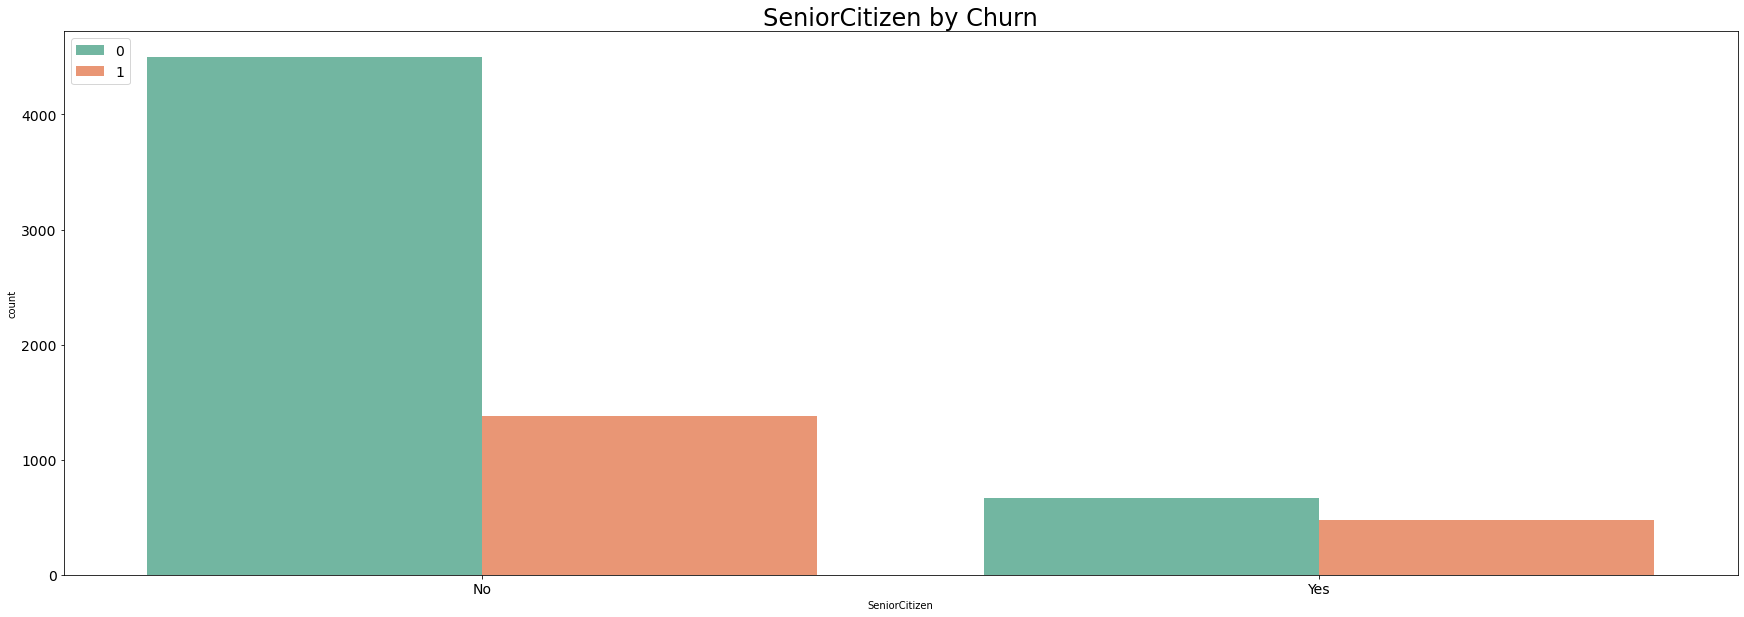

In [33]:
plt.figure(figsize = (30,10))
plt.title('SeniorCitizen by Churn', fontsize=24)
sns.countplot(data=df_clean.sort_values(by='SeniorCitizen'), x='SeniorCitizen', hue='Churn', palette="Set2")
plt.xticks( fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, fontsize=14)
plt.show()

Berdasarkan visualisasi di atas, diketahui bahwa client churn terbagi menjadi client dengan usia di atas 65 tahun alias client senior dan usia di bawah 65 tahun. Client churn dengan usia senior berjumlah 475 orang dan client dengan usia di bawah 65 tahun berrjumlah 1382 orang.

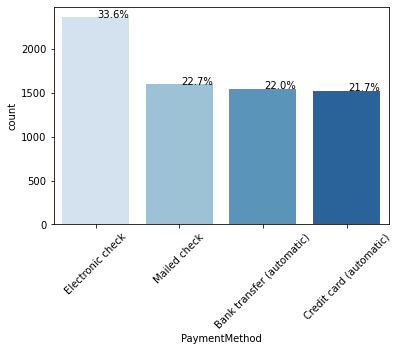

In [34]:
ax = sns.countplot(x="PaymentMethod", data=df_clean, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_clean))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

Berdasarkan visualisasi di atas, diketahui bahwa metode pembayaran ada 4 metode, yaitu : 
- Electronic check
- Mailed check
- Bank transfer
- Credit card

Metode pembayaran yang paling banyak dipilih client adalah electronic check yaitu sebesar 33.6%

In [35]:
px.box(df_clean,x='Churn',y='tenure',
       color='Churn',template='ggplot2',
       labels={'Churn':'Churn',
               'tenure':'tenure'},
       title="<b>tenure on Churn")

Berdasarkan visualisasi di atas ,diketahui bahwa client churn (kelas=1) menjadi client paling lama 72 bulan dan paling cepat 1 bulan. Sedangkan client tidak churn (kelas=0) memilih tenure paling lama 72 bulan dan paling cepat 0 bulan.

### Split Data 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(columns='Churn'), df_clean['Churn'], train_size=0.9, stratify=df_clean['Churn'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.8, stratify=y_train)

Melakukan split data yang terbagi menjadi data train, data validation , dan data test.
Pembagian sebagai berikut :
- Saat data train dan data test dilakukan split data, pembagiannya adalah 90% untuk data train dan 10% untuk data test dari keseluruhan dataset
- Saat data train dan  data validation dilakukan split data, pembagiannya adalah 80% untuk data train dan 20% untuk data validation dari keseluruhan data train

In [37]:
X = df_clean.drop(columns='Churn')
y = df_clean['Churn']

In [38]:
df_eda = pd.concat([X_train, y_train], axis=1)
testing = pd.concat([X_test, y_test], axis=1)

df_eda.shape

(5054, 20)

>Gabungkan X_train dan y_train ke dalam data train dengan variabel df_eda.

>Gabungkan X_test dan y_test ke dalam data uji dengan pengujian variabel.

Menggabungkan data dari variabel X dan Y yang telah dipisahkan lalu diberi nama variabel df_eda. Penggabungan ini untuk data latihan. Data test berbeda dengan data latihan ketika data preprocessing berasal dari data latihan.

In [39]:
X_train_eda = X_train.copy()

### EDA For Modeling

In [40]:
df_eda.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
164,Female,No,Yes,Yes,11,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.60,233.90,0
1079,Female,No,Yes,Yes,3,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,200.20,0
173,Female,No,Yes,No,53,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),94.85,5000.20,1
1422,Female,No,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),113.05,7869.05,0
668,Female,No,No,No,4,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.65,191.05,1


In [41]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_col = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### **Categorical Feature**

### Features Engineering on Categorical Feature

In [42]:
X_train_eda.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [43]:
df_eda_cat = df_eda[cat_col]

In [44]:
df_eda_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
164,Female,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0
1079,Female,No,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
173,Female,No,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),1
1422,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
668,Female,No,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Female,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4532,Female,No,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1
6933,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
4004,Male,No,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),0


In [45]:
for i in cat_col:
    print(i)
    print()
    print(df_eda[i].value_counts())
    print('-' * 10)

gender

Male      2543
Female    2511
Name: gender, dtype: int64
----------
SeniorCitizen

No     4223
Yes     831
Name: SeniorCitizen, dtype: int64
----------
Partner

No     2585
Yes    2469
Name: Partner, dtype: int64
----------
Dependents

No     3542
Yes    1512
Name: Dependents, dtype: int64
----------
PhoneService

Yes    4576
No      478
Name: PhoneService, dtype: int64
----------
MultipleLines

No     2884
Yes    2170
Name: MultipleLines, dtype: int64
----------
InternetService

Fiber optic    2244
DSL            1730
No             1080
Name: InternetService, dtype: int64
----------
OnlineSecurity

No     3617
Yes    1437
Name: OnlineSecurity, dtype: int64
----------
OnlineBackup

No     3294
Yes    1760
Name: OnlineBackup, dtype: int64
----------
DeviceProtection

No     3310
Yes    1744
Name: DeviceProtection, dtype: int64
----------
TechSupport

No     3602
Yes    1452
Name: TechSupport, dtype: int64
----------
StreamingTV

No     3095
Yes    1959
Name: StreamingTV, dtype:

Menampilkan jumlah per unique value di setiap kolom feature kategori.

### Encoding OHE 

In [46]:
ohe_list = ["PaymentMethod"]
ohe_manual = OneHotEncoder(sparse=False)
encoded = ohe_manual.fit_transform(df_eda_cat[ohe_list])
colum_encod = ohe_manual.get_feature_names(ohe_list)
feature_cat_ohe = pd.DataFrame(encoded, columns=colum_encod)


Melakukan proses encoding pada kolom PaymentMethod dengan cara One Hot Encoding(OHE) karena kolom ini dianggap peneliti lebih cocok secara intuitif dan jumlah jenis uniquenya lebih dari 3 maka dari itu kolom ini dilakukan proses encode dengan cara OHE

### Encoding Ordinal

In [47]:
ord_list = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',]
gd_cat = ['Female', 'Male']
sc_cat = ['No', 'Yes']
pr_cat = ['No', 'Yes']
dp_cat = ['No', 'Yes']
ps_cat = ['No', 'Yes']
ml_cat = ['No', 'Yes']
ints_cat = ['No' ,'DSL' ,'Fiber optic']
os_cat = ['No', 'Yes']
ob_cat = ['No', 'Yes']
dp_cat = ['No', 'Yes']
ts_cat = ['No', 'Yes']
stv_cat = ['No', 'Yes']
stm_cat = ['No', 'Yes']
contract_cat = ['Month-to-month', 'One year', 'Two year']
pb_cat = ['No', 'Yes']

ord_manual = OrdinalEncoder(categories=[gd_cat, sc_cat, pr_cat, dp_cat, ps_cat, ml_cat, ints_cat, os_cat, ob_cat, dp_cat, ts_cat, stv_cat, stm_cat, contract_cat, pb_cat])
enc_ord = ord_manual.fit_transform(df_eda_cat[ord_list])
feature_cat_ord = pd.DataFrame(enc_ord, columns=ord_list)

Kode di atas untuk melakukan encoding pada kolom kategori selain kolom `PaymentMethod`. Kolom yang memiliki unique `No` dan `Yes` serta unique `Female` dan `Male` cocok dengan Ordinal Encoding karena seperti bilangan binnar. untuk kolom `Internet Service` dan `Contract` lebih cocok menggunakan ordinal encoding karena peneliti dapat mengurutkan berdasarkan kualitas untuk kolom `Internet Service` dan berdasarkan periode untuk kolom `Contract` 

In [48]:
feature_cat_ord

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
5050,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5051,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5052,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0


In [49]:
feature_encode_concat = pd.concat([df_eda[num_col].reset_index(drop=True), feature_cat_ohe,feature_cat_ord], axis = 1)

In [50]:
feature_encode_concat

,tenure,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,11,20.60,233.90,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,69.55,200.20,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,53,94.85,5000.20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
3,70,113.05,7869.05,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
4,4,45.65,191.05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,2,95.15,196.90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
5050,15,79.75,1111.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5051,1,69.60,69.60,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5052,72,67.80,4804.65,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0


### **Numerical Feature**

In [51]:
df_eda_num = df_eda[num_col]

### View data distribution based on Skewness

Langkah ini adalah untuk mengetahui distribusi data pada kolom numerik berdasarkan nilai skewness sehingga kita bisa mengetahui apakah kolom tersebut memiliki distribusi normal atau distribusi tidak normal.

In [52]:
skew = df_eda_num.skew()
skewness = pd.DataFrame(skew)
skewness

,0
tenure,0.223957
MonthlyCharges,-0.230428
TotalCharges,0.935429


Hitung nilai skewness berdasarkan kolom numerik untuk meninjau apakah distribusi datanya berdistribusi normal atau berdistribusi tidak normal.

In [53]:
skewness.columns =['value']

In [54]:
skewness['distribusi']=0
for i in skewness.index:
  if (skewness["value"][i]>= -0.5) & (skewness["value"][i] <= 0.5):
    skewness["distribusi"][i]='distribusi normal'
  else:
    skewness["distribusi"][i]='distribusi tidak normal'
skewness

,value,distribusi
tenure,0.223957,distribusi normal
MonthlyCharges,-0.230428,distribusi normal
TotalCharges,0.935429,distribusi tidak normal


In [55]:
skewness.groupby('distribusi')[['distribusi']].count()

,distribusi
distribusi,
distribusi normal,2
distribusi tidak normal,1


Berdasarkan tahap di atas, diketahui bahwa pada penelitian ini feature numeric terdiri dari 3 feature dimana feature `tenure` dan `MonthlyCharges` memiliki distribusi normal dan feature  `TotalCharges` memiliki distribusi tidak normal

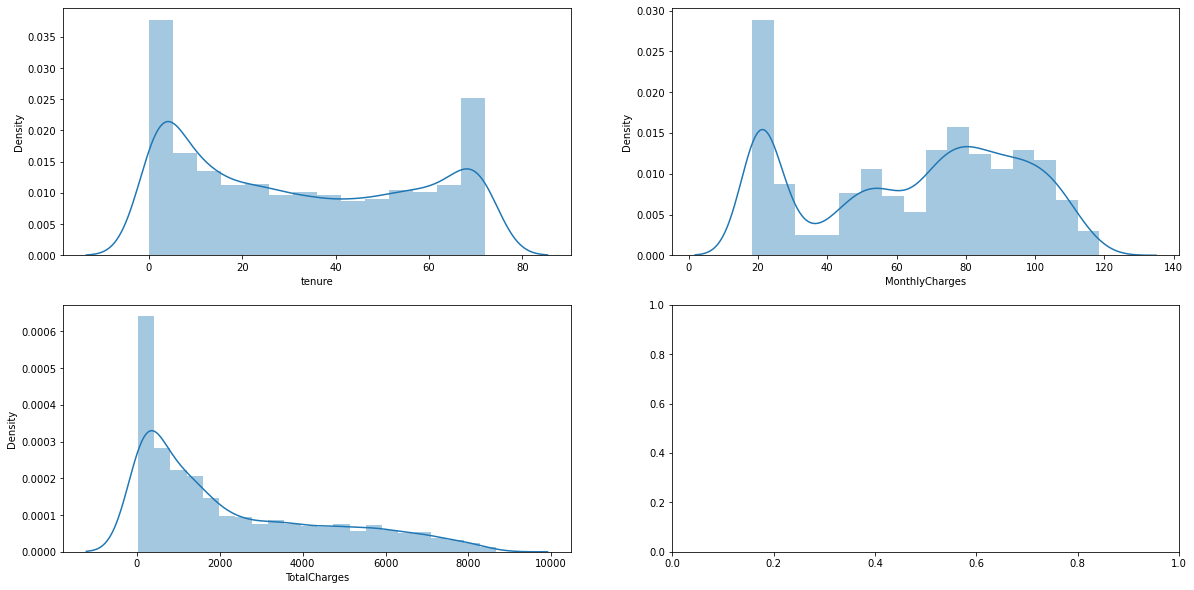

In [56]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
x=0
for i in range(2):
  for j in range(2):
    try:
      sns.distplot(df_eda[num_col[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

Visualization display of numerical distribution of data

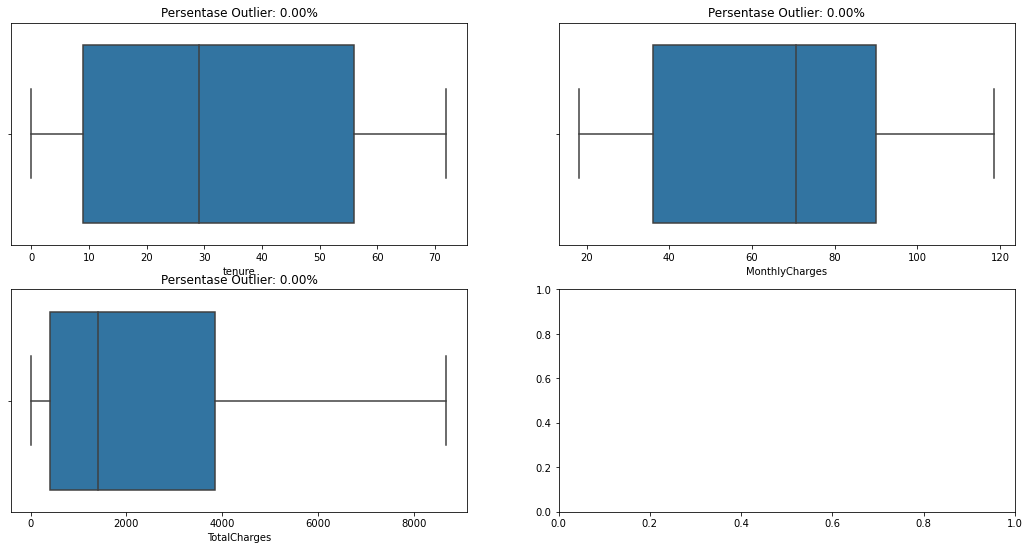

In [57]:
def outlier_analysis(df_eda,col):
  skewness = df_eda[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_eda[col].mean() + 3*df_eda[col].std()
    lower = df_eda[col].mean() - 3*df_eda[col].std()
  else:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
  
  no_outliers = df_eda[(df_eda[col]>=lower) & (df_eda[col]<=upper)]
  outliers = df_eda[(df_eda[col]<lower) | (df_eda[col]>upper)]

  return outliers,no_outliers, upper, lower

fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(18,9))
x=0
for i in range(2):
  for j in range(2):
    try:
      out,no_out, up, low = outlier_analysis(df_eda,num_col[x])
      sns.boxplot(df_eda[num_col[x]],ax=ax[i][j])
      ax[i][j].set_title('Persentase Outlier: {:.2f}%'.format(len(out)*100/len(df_eda)))
      x+=1
    except:
      pass
plt.show()

Berdasarkan pengolahan data di atas, diketahui bahwa feature numeric pada penelitian ini tidak memiliki outlier sehingga tidak perlu dilakukan handling outlier

### Pengecekan Multikolinearitas pada Feature Numerik

In [58]:
# the independent variables set
X_VIF = df_eda[num_col]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_VIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i)
                          for i in range(len(X_VIF.columns))]
  
print(vif_data)

          feature       VIF
0          tenure  6.446442
1  MonthlyCharges  3.406237
2    TotalCharges  8.217959


Uji multikolinearitas dilakukan dengan tujuan untuk mengetahui apakah pada suatu model regresi ditemukan adanya korelasi antar variabel independent. Untuk menemukan terdapat atau tidaknya multikolinearitas pada model regresi dapat diketahui dari nilai toleransi dan nilai variance inflation factor (VIF). 
- Jika nilai VIF < 10 , maka dinyatakan tidak terjadi multikolinearitas.
- Jika nilai VIF > 10 , maka dinyatakan terjadi multikolinearitas.

Berdasarkan skor VIF di penelitian ini skornya di bawah < 10 ,maka dinyatakan tidak terjadi multikolinearitas

### **Feature Selection**

Peneliti melakukan feature selection berdasarkan link di bawah ini.
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

#### Feature Selection For Category Feature using Chi-Squared

Peneliti menggunakan Chi-Squared karena input variabel yang dibutuhkan adalah feature categorical dan output variable yang dituju bersifat kategori, Pilihan yang ada adalah metode chi-squared atau Mutual Information. Peneliti memilih menggunakan metode Chi-Squared karena lebih efektif dan efisien. 

In [59]:
chi_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService' ,'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling' ,'PaymentMethod']

In [60]:
cat_final = []
for col in chi_list :
    contingency_table = pd.crosstab(df_eda[col], df_eda["Churn"])
    stat, p, dof, excepted = stats.chi2_contingency(contingency_table)
    print(col)
    print('p=%f' % (p))
    if p > 0.05 :
        print('Probably independent')
    else:
        print('Probably dependent')
        cat_final.append(col)
    print('\n')

    

gender
p=0.738569
Probably independent


SeniorCitizen
p=0.000000
Probably dependent


Partner
p=0.000000
Probably dependent


Dependents
p=0.000000
Probably dependent


PhoneService
p=0.917412
Probably independent


MultipleLines
p=0.007586
Probably dependent


InternetService
p=0.000000
Probably dependent


OnlineSecurity
p=0.000000
Probably dependent


OnlineBackup
p=0.000000
Probably dependent


DeviceProtection
p=0.000079
Probably dependent


TechSupport
p=0.000000
Probably dependent


StreamingTV
p=0.000002
Probably dependent


StreamingMovies
p=0.000001
Probably dependent


Contract
p=0.000000
Probably dependent


PaperlessBilling
p=0.000000
Probably dependent


PaymentMethod
p=0.000000
Probably dependent




Kolom dengan p value lebih besar (>) dari nilai alpha (0.05) maka kolom tersebut merupakan independent yang berarti kolom atau feature tersebut tidak memiliki hubungan yang signifikan dengan kolom target. Feature `gender` dan feature `PhoneService` pada penelitian ini dinyatakan sebagai feature yang bersifat independent.

#### Feature Selection For Numerical Feature

Feature Selection untuk numerical feature mengggunakan heatmap dengan metode Kendall karena input variabel pada penelitian ini adalah feature numerical dan output variabel bersifat kategori.

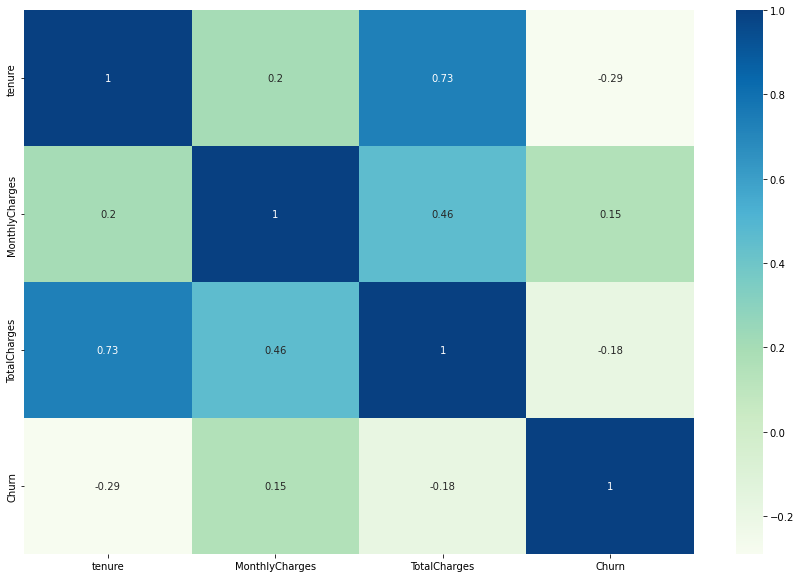

In [61]:
kor_feat = df_eda[num_col].copy()
kor_feat['Churn'] = df_eda['Churn']
plt.figure(figsize=(15, 10))
sns.heatmap(round(kor_feat.corr(method='kendall'), 2), annot=True, mask=None, cmap='GnBu')
plt.show()

Berdasarkan visualisasi heatmap di atas untuk feature numeric, peneliti memasang tresshold 0.1 sehingga feature yang memiliki nilai korelasi di atas 0.1 dianggap memiliki nilai korelasi yang cukup untuk mempenngaruhi kolom target(`Churn`). Dengan demikian seluruh feature numeric akan dimasukan kedalam pemodelan.

### Scaling Data

In [62]:
norm = 0
nonorm = 0
for col in df_eda[['tenure', 'MonthlyCharges', 'TotalCharges']]:
  if df_eda[col].skew() >=-0.5 and df_eda[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

StandardScaler()

Proses scaling data numeri akan dilkakukan dengan cara StandarScaler karena distribusi data didominasi oleh data distribusi normal.

In [63]:
scaler = StandardScaler()

df_eda[num_col] = scaler.fit_transform(df_eda[num_col])
df_eda[num_col]

,tenure,MonthlyCharges,TotalCharges
164,-0.876692,-1.477555,-0.910343
1079,-1.202918,0.150137,-0.925163
173,0.835995,0.991415,1.185706
1422,1.529225,1.596604,2.447324
668,-1.162140,-0.644589,-0.929187
...,...,...,...
1148,-1.243697,1.001391,-0.926614
4532,-0.713579,0.489308,-0.524252
6933,-1.284475,0.151799,-0.982596
4004,1.610782,0.091945,1.099710


## 5.Prepocessing

### Pipeline Sklearn

In [64]:
X_train_full, X_test, y_train_full, y_test = train_test_split( X,
                                                               y,
                                                               shuffle=True, test_size=0.2,
                                                               stratify = y
                                                               )
                                                            
X_train, X_val ,y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

In [65]:
X_train.shape

(4492, 19)

Setelah melakukan proses split data ,diketahui bahwa X_Train terdiri dari 4492 baris dan 19 kolom. 

In [66]:
X_val.shape

(1124, 19)

Setelah melakukan proses split data ,diketahui bahwa X_val terdiri dari 1124 baris dan 19 kolom. 

In [67]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])
num_tr = num_pipeline.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
num_tr

array([[-0.31574524,  0.20414202, -0.23596437],
       [-1.25129073,  0.49198701, -0.92664834],
       [-0.39709703,  0.83806655, -0.12317857],
       ...,
       [-0.84453182, -0.21514665, -0.6870197 ],
       [ 1.59602162,  0.9046203 ,  1.96694984],
       [-1.12926306, -0.64608222, -0.91799447]])

num_pipeline adalah nama variabel yang berisi pipeline untuk melakukan imputer saat terjadi missing values dan melakukan scaler dengan metode StandarScaler. Tahap ini dilakukan untuk numeric feature.

In [68]:
cat_1_pipeline = Pipeline([
    ('ord_enc', OrdinalEncoder(categories=[['Female', 'Male'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No' ,'DSL' ,'Fiber optic'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['Month-to-month', 'One year', 'Two year'], ['No', 'Yes']]))
])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['gender' , 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']])
cat_1_tr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 2., 1.],
       [1., 1., 0., ..., 0., 0., 0.]])

cat_1_pipeline berisi pipeline yang berisi feature encoding dengan cara ordinal encoding untuk feature kategori pada penelitian ini

In [69]:
cat_2_pipeline = Pipeline([
    ('ohe_enc', OneHotEncoder(sparse=False))
])

cat_2_tr = cat_2_pipeline.fit_transform(X_train[["PaymentMethod"]])
cat_2_tr

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

cat_2_pipeline adalah variabel yang berisi fungsi pipeline untuk melakukan encoding dengan cara One Hot Encoding(OHE). pipeline ini digunakan untuk feature `PaymentMethod`.

In [70]:
imbalance_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['tenure', 'MonthlyCharges', 'TotalCharges']),
        ("ord_enc", cat_1_pipeline, ['gender' , 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']),
        ("ohe_enc", cat_2_pipeline, ['PaymentMethod'])
    ])


imbalance_pipeline adalah variabel pipeline dengan kondisi data pada kolom target mengalami imbalance data. imbalance_pipeline adalah variabel yang terdiri dari beberapa variabel yaitu mum_pipline,cat_1_pipeline, dan cat_2_pipeline.

In [71]:
#imbalance pipeline
balance_pipeline = imbpipe([
            ('preprocess', imbalance_pipeline),
            ('over_sampl', SMOTENC(categorical_features=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],sampling_strategy='minority', random_state=0))
])

balance_pipeline adalah variabel pipeline dengan fungsi SMOTENC untuk menghandling imbalance data pada kolom target.
[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22] adalah urutan kolom kategori yang ada pada variabel X_Train

In [72]:
X_train_resampled, y_train_resampled = balance_pipeline.fit_resample(X_train, y_train)

In [73]:
imbalance_pipeline.fit_transform(X_train)
X_test = imbalance_pipeline.transform(X_test)
X_val = imbalance_pipeline.transform(X_val)

In [74]:
X_train_resampled.shape

(6614, 22)

X_train_resampled terdiri dari 6614 baris dan 22 kolom

In [75]:
X_test.shape

(1405, 22)

X_test terdiri dari 1405 baris dan 22 kolom

In [76]:
X_val.shape

(1124, 22)

X_val terdiri dari 1124 baris dan 22 kolom.

### Pipeline Tensorflow

In [225]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
train_dataset = train_dataset.shuffle(buffer_size=3500).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32)

Kode di atas adalah kode untuk membuat pipeline tensorflow untuk mempermudah saat data masuk ke dalam pemodelan.

## 6.Model Definition

Pada tahap ini, penelitian dilakukan dengan model sequential dan model functional. Model Sequential akan digunakan ke dalam 2 model kelompok parameter yang berbeda. Sequetial model 1 terdiri dari parameter-parameter sederhana dibanding dengan Sequential model 2. Hal ini dilakukan pula pada model Functional.

### Sequential

In [231]:
#Sequential model 1
model_seq1 = Sequential()
model_seq1 = tf.keras.models.Sequential()
model_seq1.add(tf.keras.layers.Dense(units=50, activation='relu', input_shape = (22,)))
model_seq1.add(tf.keras.layers.Dense(units=30, activation='relu'))
model_seq1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model_seq1.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [235]:
#Sequential model 2
model_seq2 = tf.keras.models.Sequential()
model_seq2.add(tf.keras.layers.Dense(units=50, activation='relu', input_shape = (22,), kernel_initializer='HeNormal', kernel_regularizer='l2'))
model_seq2.add(tf.keras.layers.BatchNormalization())
model_seq2.add(tf.keras.layers.Dense(units=30, activation='relu'))
model_seq2.add(tf.keras.layers.BatchNormalization())
model_seq2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model_seq2.compile(optimizer =tf.keras.optimizers.Adam(clipvalue=0.01), loss= 'binary_crossentropy', metrics = ['accuracy'])

Perbedaan yang mendasar dari Sequential model 1 dan Sequential model 2 adalah pada model 2, contohnya peneliti menambahkan kode tf.keras.layers.BatchNormalization().

- activation di layer input menggunakan `relu` karena ReLU pada intinya hanya membuat pembatas pada bilangan nol, artinya apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x
- optimizer menggunakan Adam karena Adam dianggap sebagai optimezer terfavorit oleh kalangan data scienetist.
- activation pada layer output menggunakan `sigmoid` karena penelitian ini memiliki kolom target yang bersifat klafikasi 2 kelas
- loss yang digunakan adalah binari_crossentropy karena penelitian ini membahas tentang persoalan klasifikasi biner
- metrics yang dipilih accuracy karena kita ingin melihatt dang mengukur perfotma model.

Pada model 2, peneliti merubah beberapa parameter seperti kernel initilazer dan kernel regularizer untuk mencoba menemukan performa yang berbeda dibandingkan dengan model Sequential model 1 

### Functional

In [251]:
#Functional model 1
input_layer = tf.keras.Input(shape= (22, ), name= "input_layer")
hidden_1 = tf.keras.layers.Dense(20, activation='relu', name='hidden_1')(input_layer)
hidden_2 = tf.keras.layers.Dense(10, activation="relu", name = 'hidden_2')(hidden_1)
output_layer = tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")(hidden_2)

model_func_1 = tf.keras.Model(inputs = input_layer, outputs =  output_layer)
model_func_1.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [254]:
#Functional model 2
input_lyr = tf.keras.layers.Input(shape=(22,))
layers = tf.keras.layers.Dense(20, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(10, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
output = tf.keras.layers.Dense(1, kernel_initializer='HeNormal', activation="sigmoid")(layers)

model_func_2 = tf.keras.Model(inputs = input_lyr, outputs =  output)
model_func_2.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.01), loss='binary_crossentropy', metrics=['accuracy'])

Model Functional pada penelitian ini terdiri dari Functional model 1 dan Functional model 2. Perbedaannya adalah terletak di beberapa parameternya seperti pada model 2 ditambahkan parameter BatchNormalizatioon dan clipvalue ppada optimizer Adam.

## 7.Model Training

### Sequential model 1

In [232]:
#sequential model 1
history_seq_1 = model_seq1.fit(train_dataset, epochs= 20, batch_size=32, validation_data=val_dataset)

Epoch 1/20
207/207 [==============================] - 1s 2ms/step - loss: 0.4600 - accuracy: 0.7800 - val_loss: 0.5553 - val_accuracy: 0.7269
Epoch 2/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8110 - val_loss: 0.5546 - val_accuracy: 0.7198
Epoch 3/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8208 - val_loss: 0.5249 - val_accuracy: 0.7447
Epoch 4/20
207/207 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8154 - val_loss: 0.4802 - val_accuracy: 0.7669
Epoch 5/20
207/207 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8292 - val_loss: 0.5076 - val_accuracy: 0.7607
Epoch 6/20
207/207 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8305 - val_loss: 0.5112 - val_accuracy: 0.7536
Epoch 7/20
207/207 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8332 - val_loss: 0.5034 - val_accuracy: 0.7580
Epoch 

### Sequential model 2

In [236]:
#sequential model 2
history_seq_2 = model_seq2.fit(train_dataset, epochs= 20, batch_size=32, validation_data=val_dataset)

Epoch 1/20
207/207 [==============================] - 2s 3ms/step - loss: 1.2621 - accuracy: 0.7723 - val_loss: 1.1118 - val_accuracy: 0.6948
Epoch 2/20
207/207 [==============================] - 0s 2ms/step - loss: 0.9030 - accuracy: 0.7864 - val_loss: 0.8033 - val_accuracy: 0.7518
Epoch 3/20
207/207 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.7932 - val_loss: 0.7030 - val_accuracy: 0.7589
Epoch 4/20
207/207 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.8047 - val_loss: 0.6408 - val_accuracy: 0.7509
Epoch 5/20
207/207 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.8112 - val_loss: 0.5828 - val_accuracy: 0.7616
Epoch 6/20
207/207 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.8127 - val_loss: 0.5878 - val_accuracy: 0.7518
Epoch 7/20
207/207 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.8093 - val_loss: 0.5615 - val_accuracy: 0.7580
Epoch 

Pada tahap model training untuk model sequential model 1 dan sequential model 2 di atas adalah hasil paling maksimal dari berbagai kombinasi peneliti lakukan setelah melakukan trial and error berkali kali dengan mengubah jumlah epoch dan batch_size. Peneliti memasukan epoch 20,30,40,50,100 dan batch_size  16,32,64,128, dan 256. Hasilnya nilai terbaik berada di kombinasi epoch 20 dan batch_size 32. Hal ini diukur di tahap selanjutnya pada bagian test.  

### Functional model 1

In [252]:
#Functional model 1
history_func_1 = model_func_1.fit(train_dataset, epochs = 20, batch_size=16 ,validation_data = val_dataset)

Epoch 1/20
207/207 [==============================] - 2s 2ms/step - loss: 0.5430 - accuracy: 0.7345 - val_loss: 0.5335 - val_accuracy: 0.7553
Epoch 2/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8041 - val_loss: 0.4930 - val_accuracy: 0.7696
Epoch 3/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8084 - val_loss: 0.5232 - val_accuracy: 0.7527
Epoch 4/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8093 - val_loss: 0.5421 - val_accuracy: 0.7295
Epoch 5/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8050 - val_loss: 0.5102 - val_accuracy: 0.7464
Epoch 6/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8101 - val_loss: 0.4949 - val_accuracy: 0.7642
Epoch 7/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8137 - val_loss: 0.5270 - val_accuracy: 0.7411
Epoch 

### Functional model 2

In [255]:
#Functional model 2
history_func_2 = model_func_2.fit(train_dataset, epochs = 20, batch_size=16 ,validation_data = val_dataset)

Epoch 1/20
207/207 [==============================] - 3s 3ms/step - loss: 0.9170 - accuracy: 0.6911 - val_loss: 0.8401 - val_accuracy: 0.6753
Epoch 2/20
207/207 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.7721 - val_loss: 0.6791 - val_accuracy: 0.7278
Epoch 3/20
207/207 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.7785 - val_loss: 0.6116 - val_accuracy: 0.7322
Epoch 4/20
207/207 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7829 - val_loss: 0.5879 - val_accuracy: 0.7456
Epoch 5/20
207/207 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7832 - val_loss: 0.5597 - val_accuracy: 0.7402
Epoch 6/20
207/207 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7918 - val_loss: 0.5444 - val_accuracy: 0.7402
Epoch 7/20
207/207 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7971 - val_loss: 0.5461 - val_accuracy: 0.7438
Epoch 

Sama seperti model sequential, pada model functional, peneliti melakukan beberapa kombinasi saat melakukan trial and error.

## 8.Model Evaluation

### Sequential

### Sequential Model 1

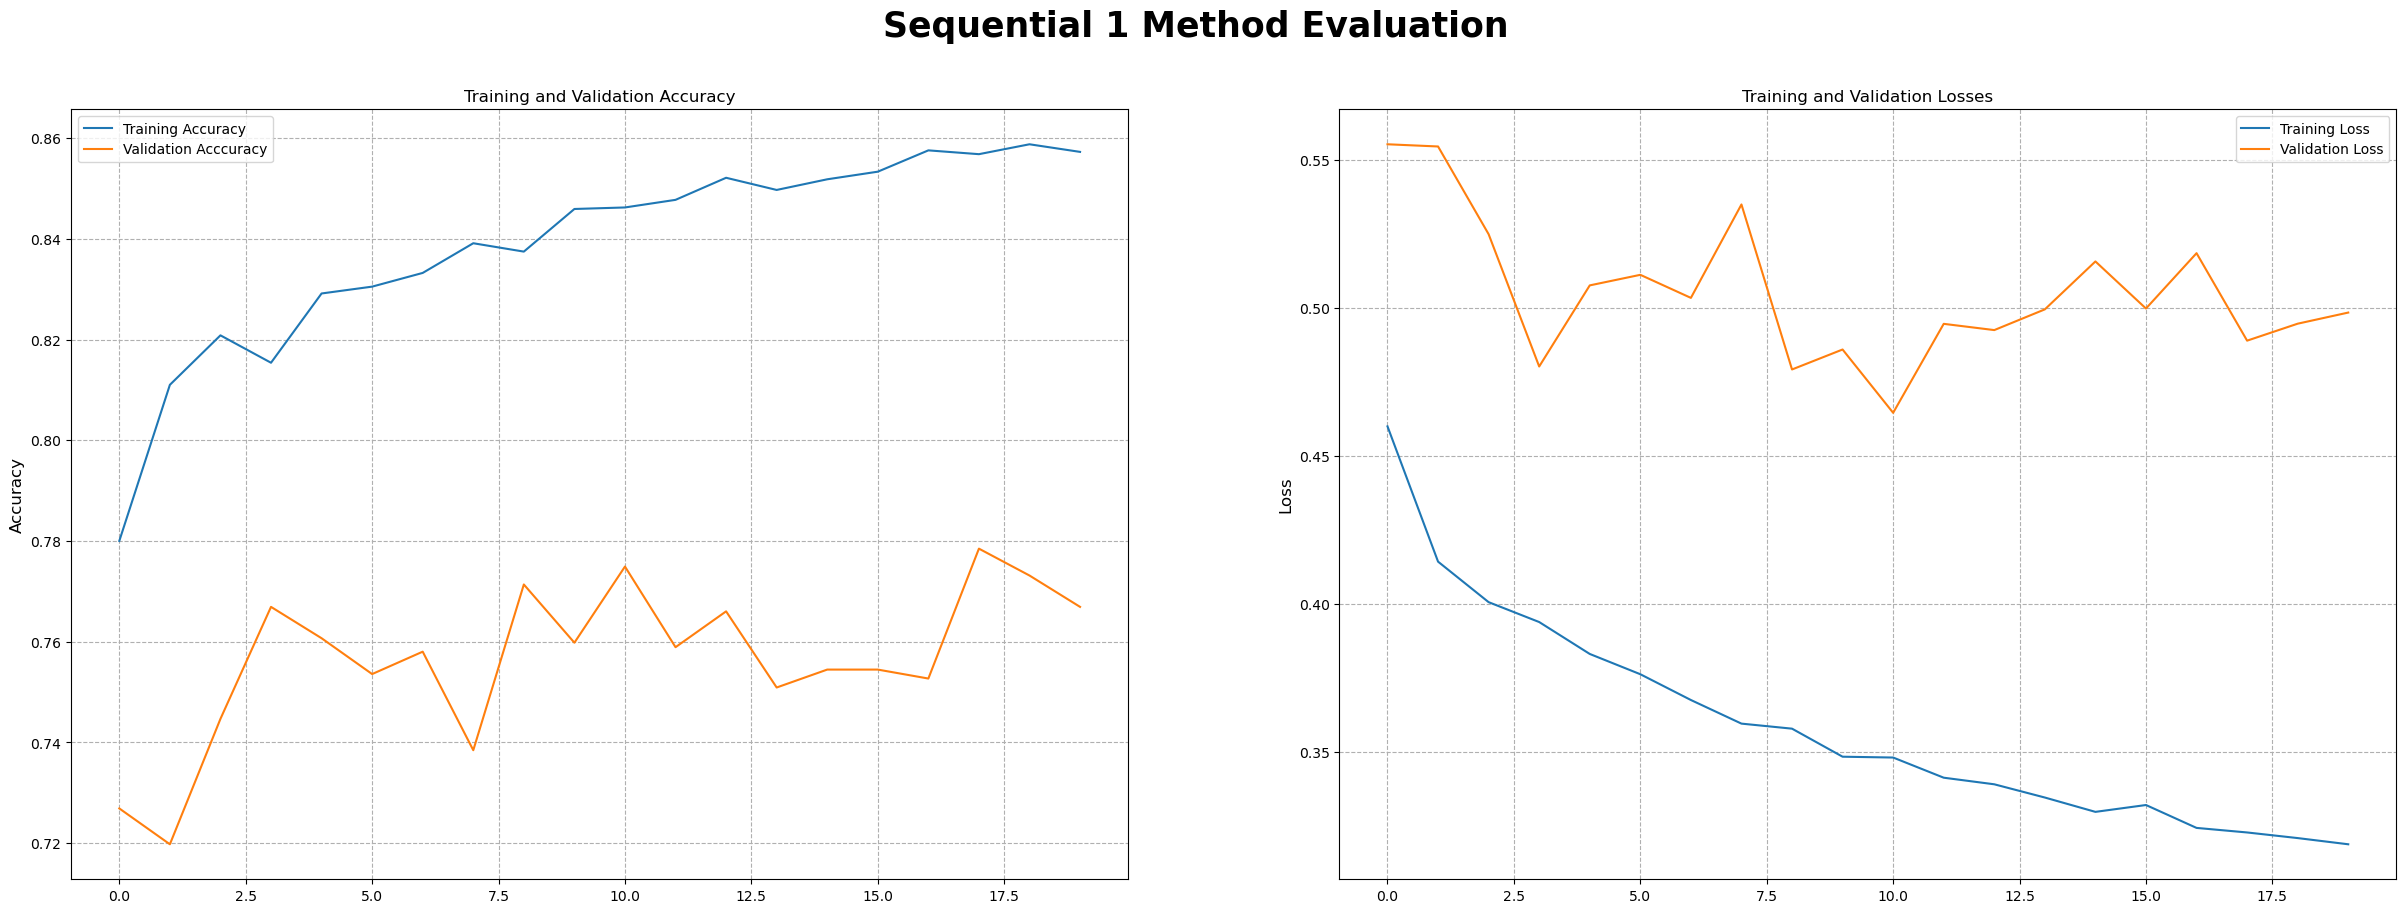

In [233]:
#Sequential
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential 1 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq_1.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq_1.history['loss'], label="Training Loss")
plt.plot(history_seq_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Pada grafik di atas menampilkan grafik yang tidak saling bersinggungan namun grafik tidak mengalami vanishing maupun eksploding.

In [234]:
#Sequential
print("\nEvaluate on test data")
result = model_seq1.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
44/44 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7566
Test - Loss     :  0.4896201491355896
Test - Accuracy :  0.7565836310386658



Hasil di atas adalah untuk menjelaskan model pada tahap testing.

### Sequential Model 2

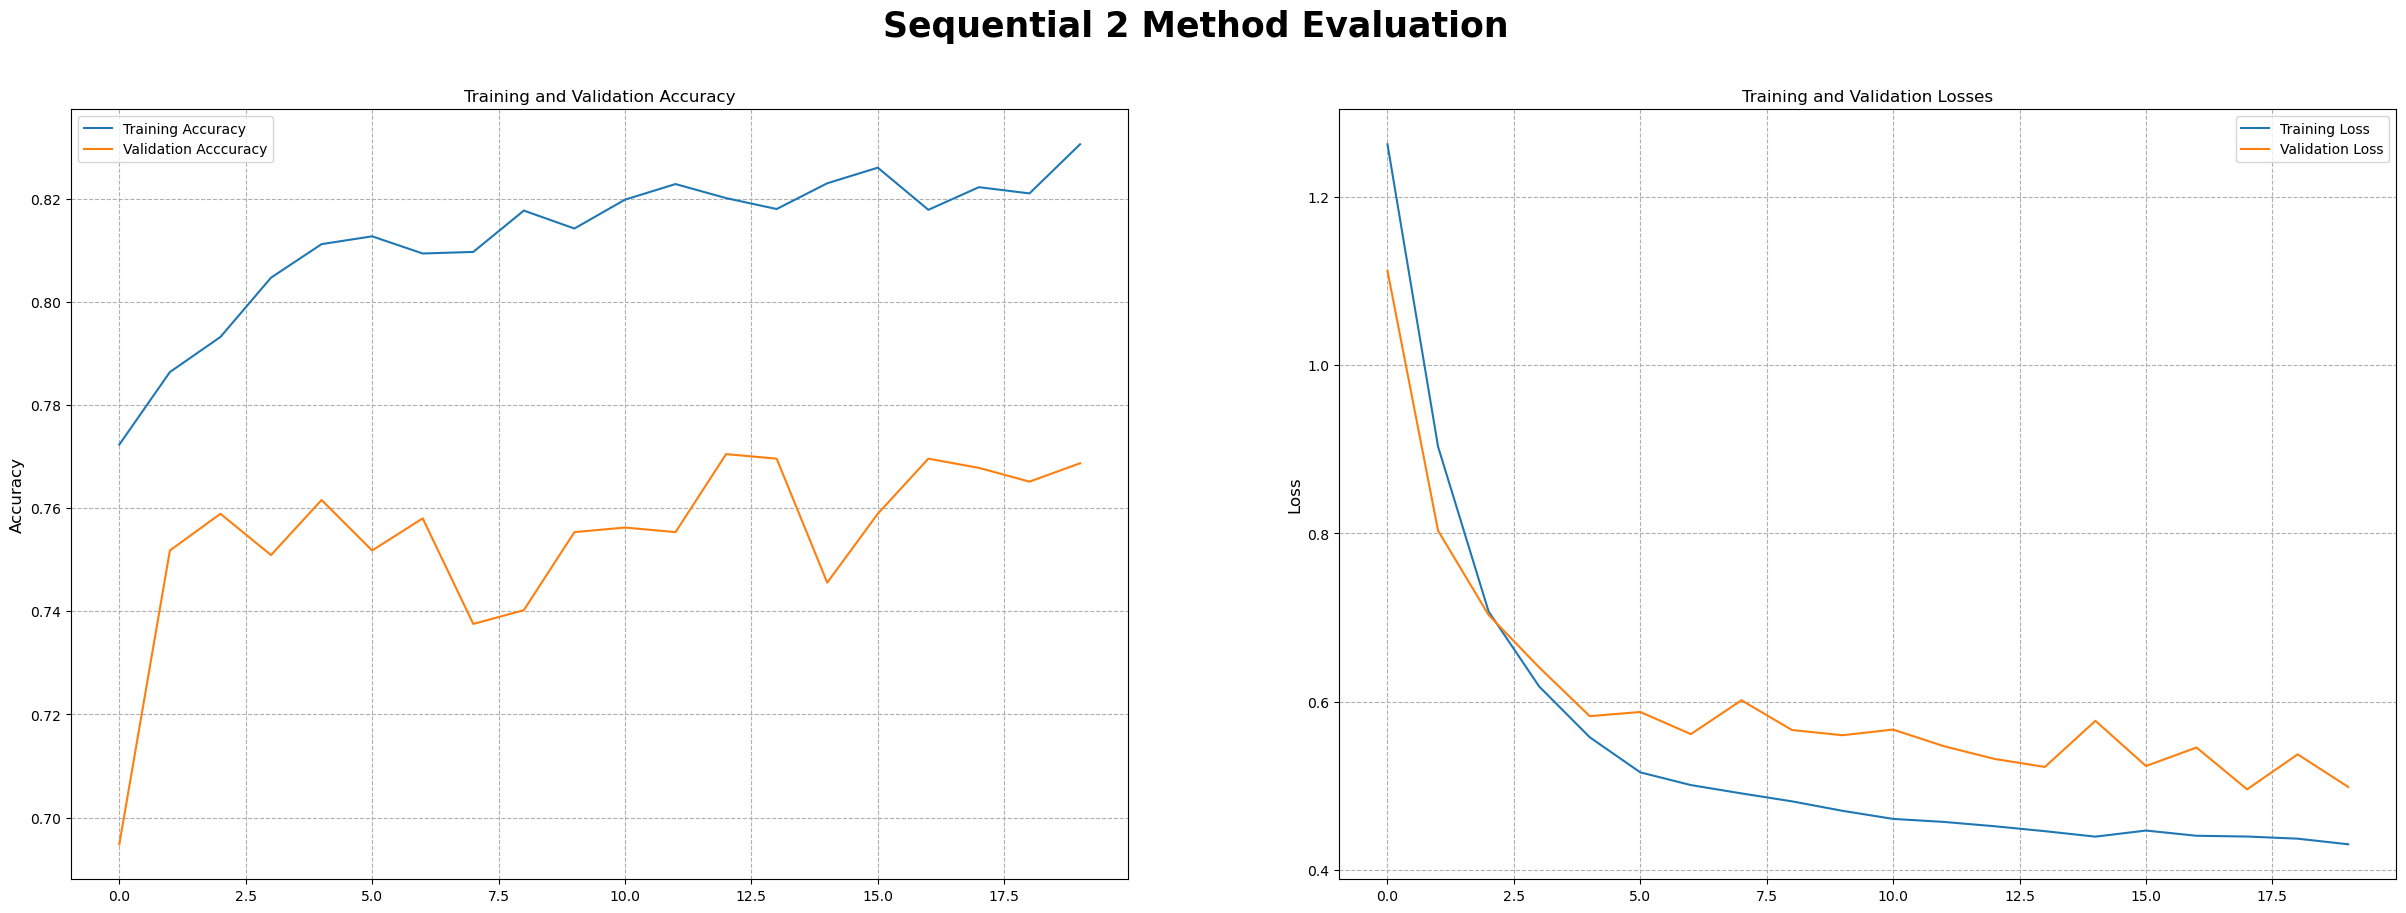

In [237]:
#Sequential Model 2
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential 2 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq_2.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq_2.history['loss'], label="Training Loss")
plt.plot(history_seq_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Grafik di atas lebih baik baik dibandingkan dengan sequential model 1. Meskipun pada grafik sebelah kiri yang membahas accuracy tidak bersinggungnan namun memiliki pola yang sama dan tidak terlalu jauh antara training dan validation. Pada bagian loss antara training dan validation tidak terlalu jauh jaraknya.

In [238]:
#Sequential Model 2
print("\nEvaluate on test data")
result = model_seq2.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
44/44 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.7715
Test - Loss     :  0.4911351799964905
Test - Accuracy :  0.771530270576477



Saat model masuk ke data testing hasilnya adalah skor loss sebesar 0.49 dan accuracy sebesa 0.77

### Functional

### Functional Model 1

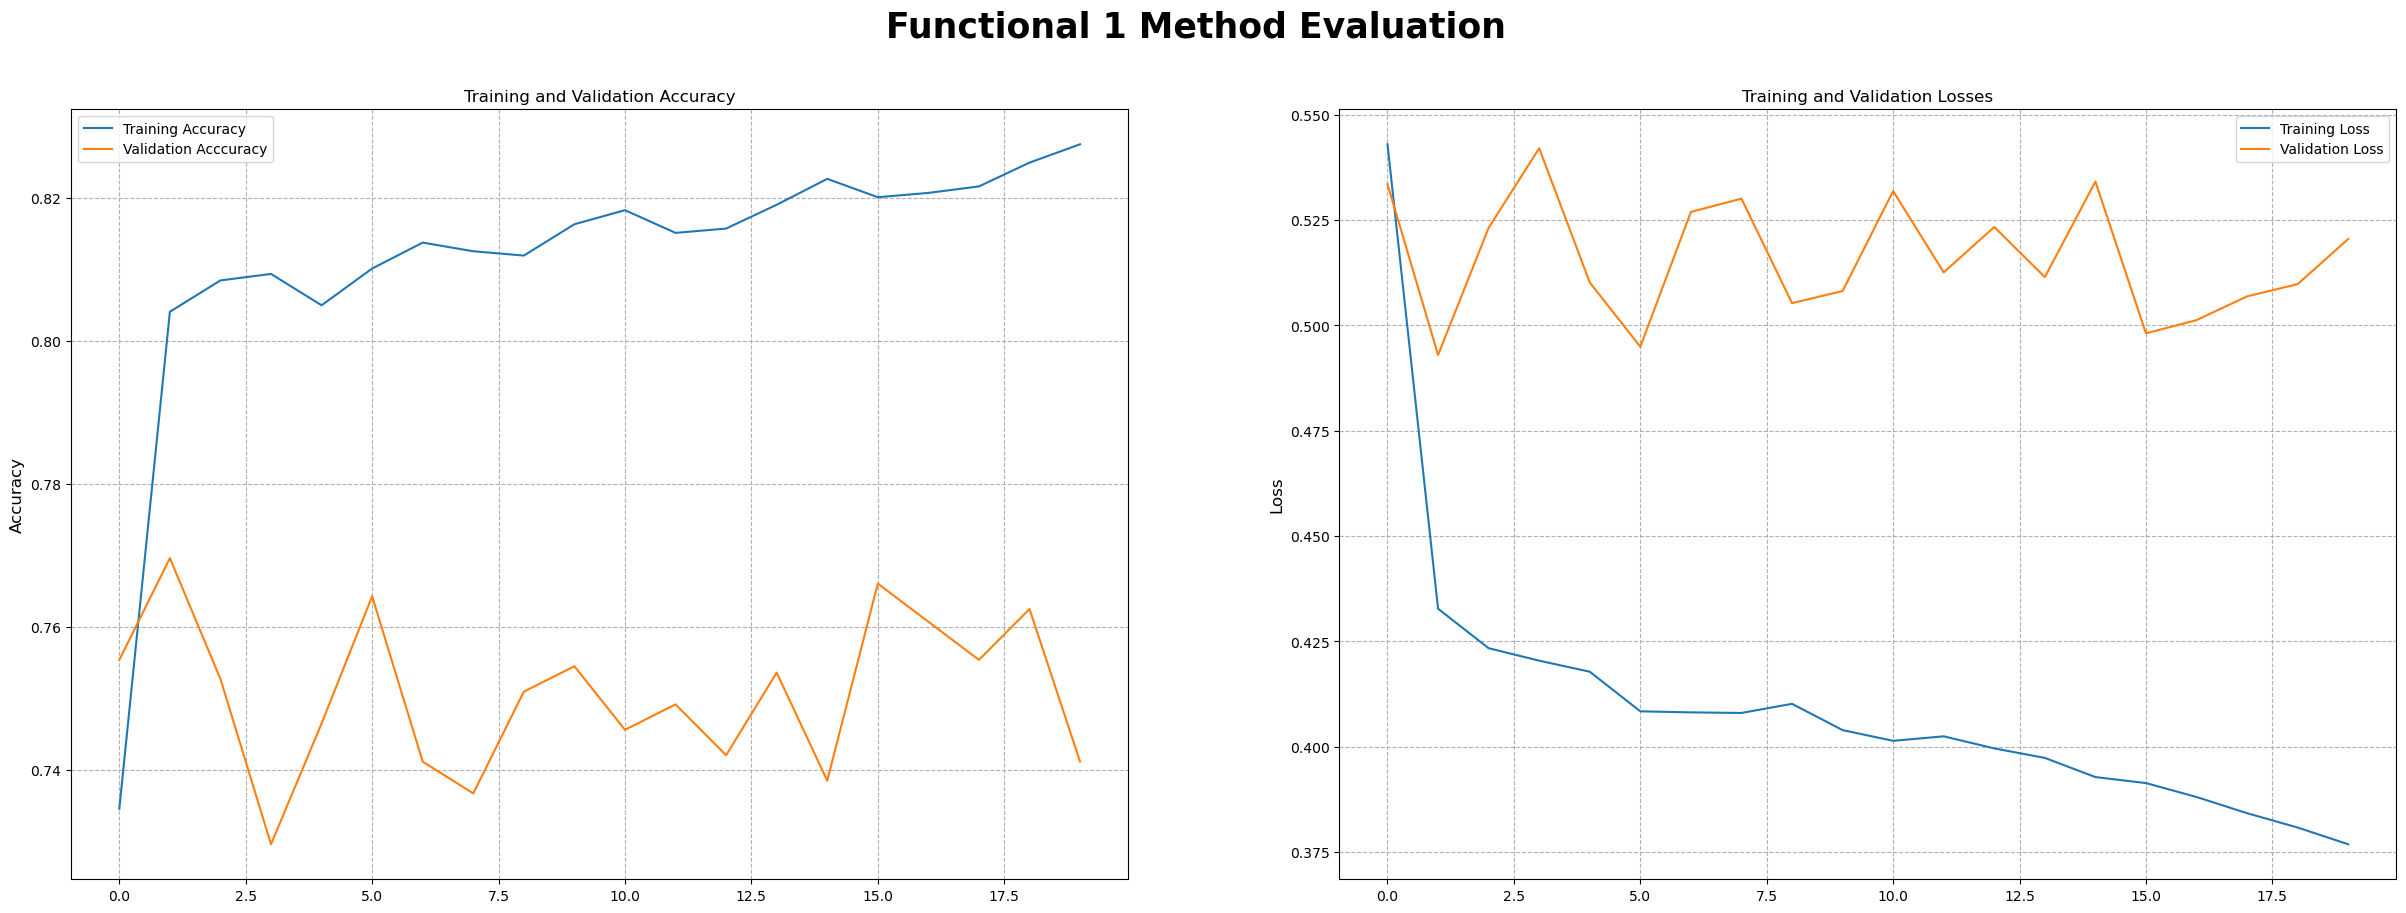

In [253]:
#Functional
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional 1 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_func_1.history['accuracy'],label="Training Accuracy")
plt.plot(history_func_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_func_1.history['loss'], label="Training Loss")
plt.plot(history_func_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Pada grafik di atas menunjukkan bahwa grafik mengalami eksploding pada data validation. Namun masih bersinggungan di titik awal.

In [248]:
#Functional
print("\nEvaluate on test data")
result = model_func_1.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
44/44 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7530
Test - Loss     :  0.545160710811615
Test - Accuracy :  0.7530249357223511



pada testing pada functional model 1 memiliki score loss sebsar 0.545 dan accuracy 0.75

### Functional Model 2

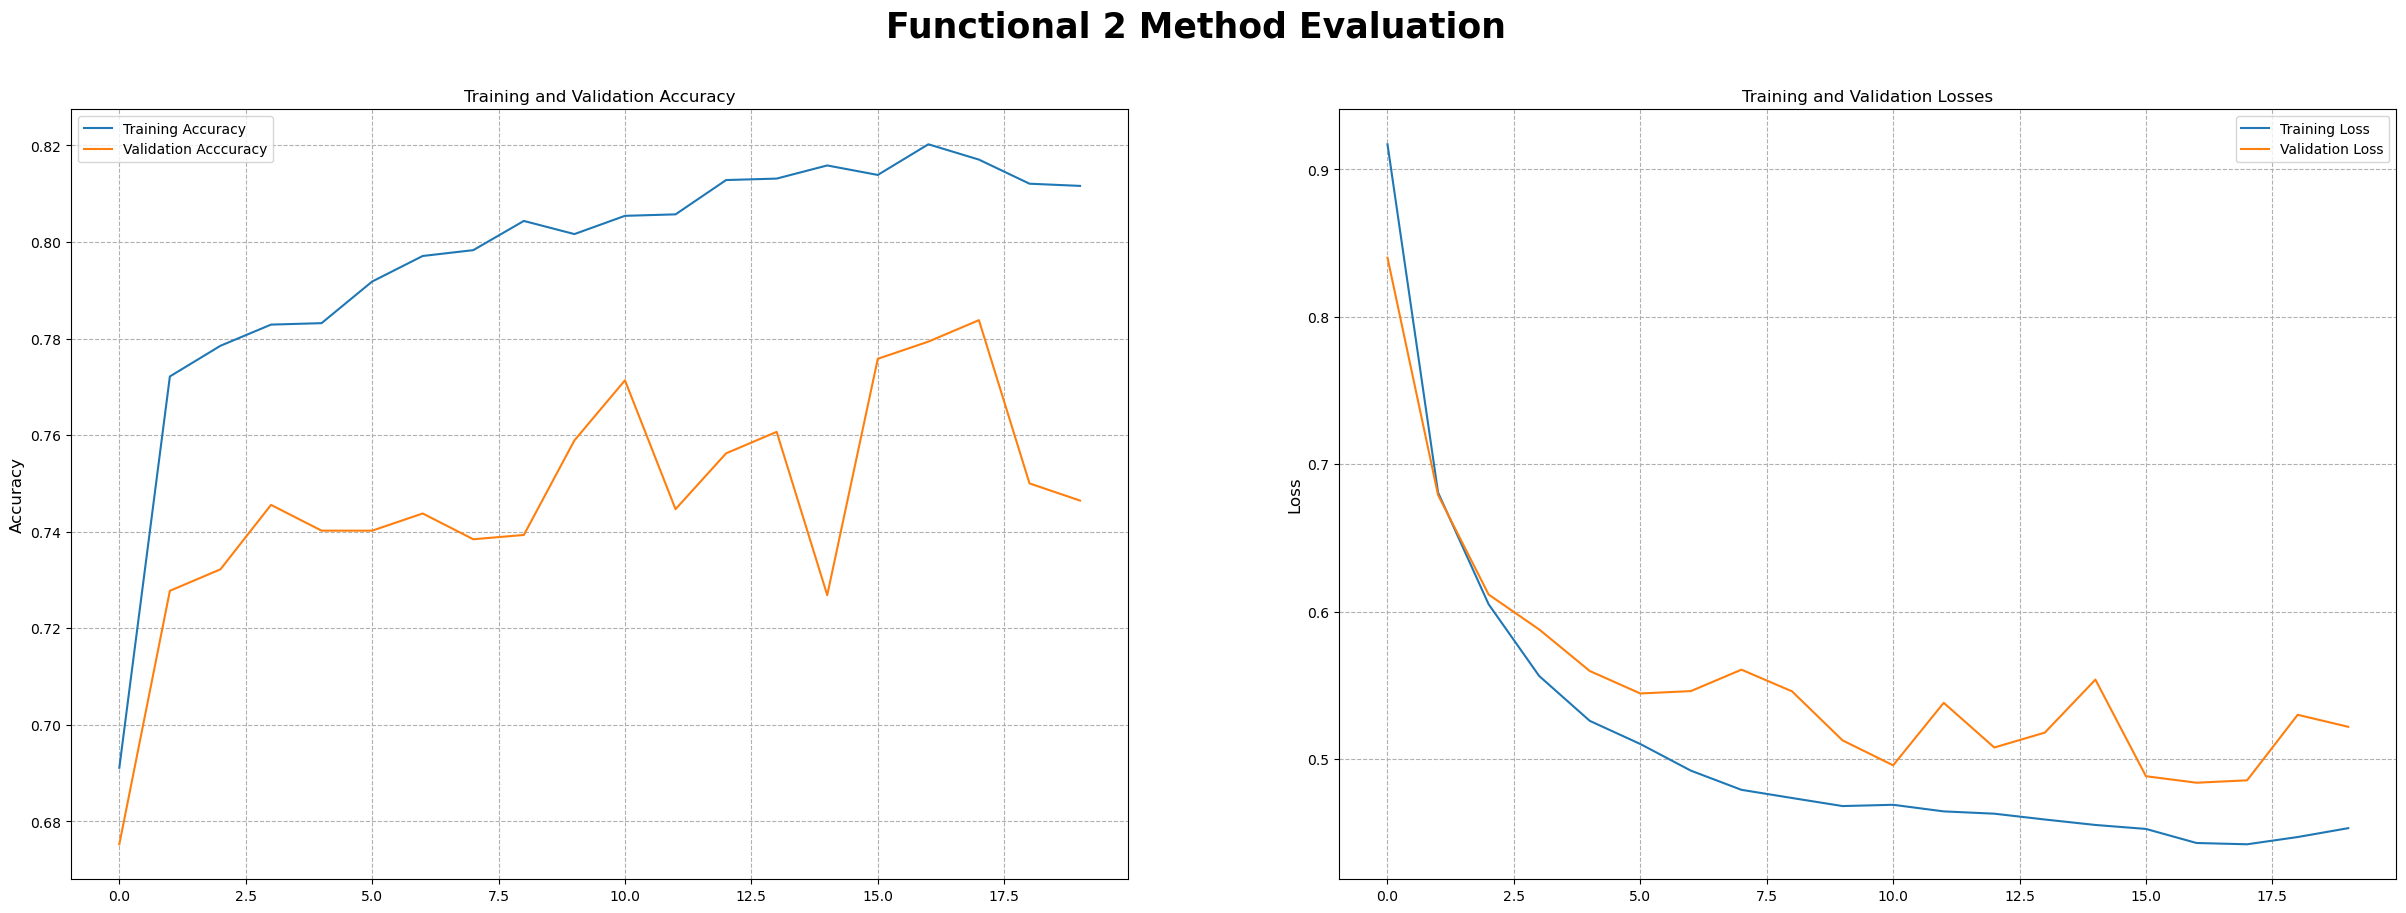

In [259]:
#Functional
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional 2 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_func_2.history['accuracy'],label="Training Accuracy")
plt.plot(history_func_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_func_2.history['loss'], label="Training Loss")
plt.plot(history_func_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Grafik di atas menunjukan grafik yang lebih baik dibandingkan dengan functional model 1 karena jarak garis tidak terlalu jauh antara training dan validasi.

In [258]:
#Functional
print("\nEvaluate on test data")
result = model_func_2.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
44/44 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7530
Test - Loss     :  0.5101765394210815
Test - Accuracy :  0.7530249357223511



Hasil test dengan menggunaknan model di atas menghasilkan score test loss sebesar 0.51 dan tesst score accuracy sebesar 0.75 

Berdasarkan hasil Test dari 4 model di atas maka hasil terbaik jatuh pada model `sequential model 2` karena memiliki score loss yang termasuk paling kecil dibanding ketiga model lainnya yaitu bernilai `0.49` dan skor accuracy pada test sebesar `0.77`.

In [94]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from matplotlib import pyplot

44/44 [==============================] - 0s 4ms/step
[[847 186]
 [135 237]]


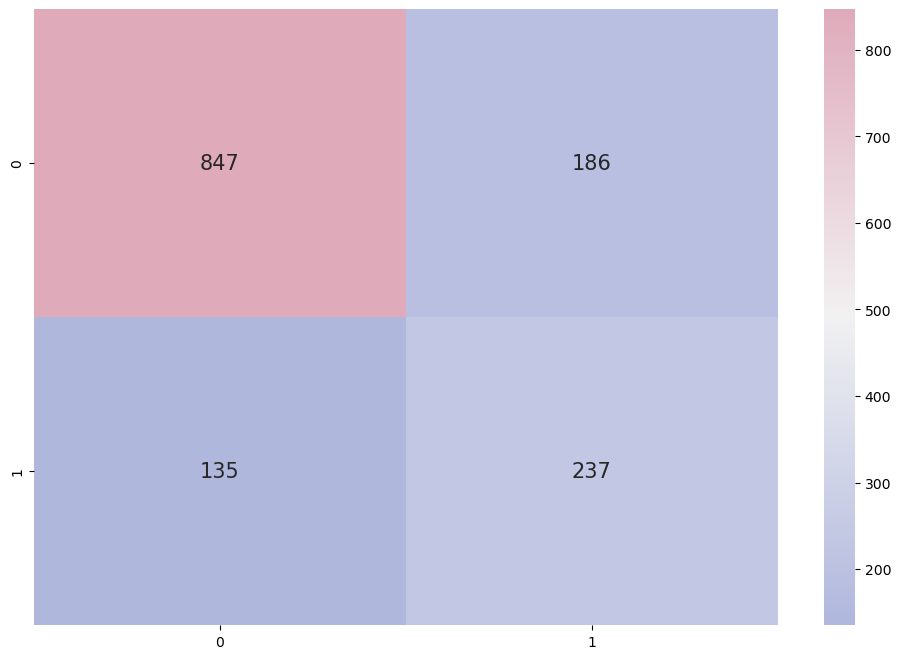

In [295]:
y_pred = model_seq2.predict(X_test)

cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred.round())
print(cf_matrix)

sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');

In [96]:
print(f'model 1 accuracy score: {accuracy_score(y_test, y_pred.round())}')

model 1 accuracy score: 0.7722419928825622


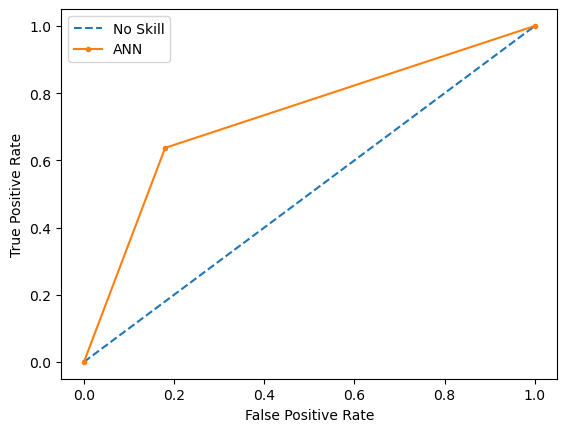

AUC score: 0.7285193454704432


In [296]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred.round())
auc = roc_auc_score(y_test,y_pred.round())

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

In [294]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.64      0.60       372

    accuracy                           0.77      1405
   macro avg       0.71      0.73      0.72      1405
weighted avg       0.78      0.77      0.78      1405



## 9.Model Saving

Pada tahap ini dilkakukan model saving untuk mempermudah proses deploy saat melakukan input data baru

In [99]:
with open ("pipeline.pkl", "wb") as f :
    pickle.dump(imbalance_pipeline, f)

In [271]:
model_func_1.save('model.h5')

In [272]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.11.0
1.1.3
1.21.5


## 10.Model Inference

Pada tahap ini akan melakukan hasil pemodelan dengan data baru di mana data baru ini bukan bagian dari dataset yangada sehingga hasil perhitungan model lebih orisinal.

In [101]:
df_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [266]:

new_data = {'gender': "Male",
  'SeniorCitizen': "No",
  'Partner': 'No',
  'Dependents': "Yes",
  'tenure': 6,
  'PhoneService': "Yes",
  'MultipleLines': "Yes",
  'InternetService': "Fiber optic",
  'OnlineSecurity': "Yes",
  'OnlineBackup': "No",
  'DeviceProtection': "Yes",
  'TechSupport': "Yes",
  'StreamingTV': "No",
  'StreamingMovies': "No",
  'Contract': "Month-to-month",
  'PaperlessBilling': "No",
  'PaymentMethod': "Mailed check",
  'MonthlyCharges': 57,
  'TotalCharges': 332}


new_data = pd.DataFrame([new_data])
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,No,No,Yes,6,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,57,332


In [269]:
with open('pipeline.pkl', 'rb') as f:
    pipe_branch = pickle.load(f)


In [276]:
data_inf_final = pd.DataFrame(pipe_branch.transform(new_data))
data_inf_final

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.088587,-0.26007,-0.866489,1.0,0.0,0.0,1.0,1.0,1.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [273]:
load_model_func = load_model('model.h5')

In [278]:
res_inf = load_model_func.predict(data_inf_final)
res_inf

1/1 [==============================] - 0s 418ms/step


array([[0.3371982]], dtype=float32)

In [279]:
res_inf = np.where(res_inf >= 0.5, 1, 0)
res_inf

array([[0]])

Melakukan kodingan untuk melakukan pembatas. apabila score yang dihasilkan di bawah 0.5 maka data akan masuk ke kelas 0 . apabila masuk ke kelas 1 maka data akan masuk ke kelas 1.

In [280]:
new_data['predict Churn']=res_inf

In [281]:
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predict Churn
0,Male,No,No,Yes,6,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,57,332,0


## 11.Conclusion

Berdasrkan penelitian ini kesimpulannya adalah sebagai berikut :
1. Pada penelitian ini ditemukan bahwa persentase client churn rate di Telco industry mencapai 26% angka yang besar dalam bisnis industri telekomunikasi.
2. client churn dengan gender female lebih banyak dibandingkan dengan client gender male. Jumlah selisihnya 11 orang
3. client churn terbagi menjadi client dengan usia di atas 65 tahun alias client senior dan usia di bawah 65 tahun. Client churn dengan usia senior berjumlah 475 orang dan client dengan usia di bawah 65 tahun berrjumlah 1382 orang.
4. Metode pembayaran yang paling banyak dipilih client adalah electronic check yaitu sebesar 33.6%
5. client churn (kelas=1) menjadi client paling lama 72 bulan dan paling cepat 1 bulan. Sedangkan client tidak churn (kelas=0) memilih tenure paling lama 72 bulan dan paling cepat 0 bulan.

6. Penelitian ini mampu membuat model yang berjalan cukup baik karena mampu memprediksi client churn berdasarkan feature-feature yang ada. Apabila perusahaan mengetahui client mana saja yang berpotensi menjadi client churn maka perusahaan dapat melakukan upaya upaya agar client yang diprediksi akan churn tidak meninggalkan kerja sama dengan perusahaan Telco industry. misalnya perusahaan dapat melakukan survey kepuasaan pelanggan, memberikan promo, meningkatkan pelayanan, beradaptasi terhadap strategi kompetitior.

7. Pipeline dibuat untuk membuat proses penelitian lebih efisien saat pemodelan terutama saat ditahap deploy

8. Pada penelitian ini memiliki 4 pilihan model
- Model Sequential model 1
- Model Sequential model 2
- Model Funtional model 1
- Model Functional model 2
model terbaik dipilih berdasarkan Nilai Loss dan Nilai Accuracy saat model masuk ke data test.

9. Model Sequential model 2 memiliki nilai accuracy tertinggi dibandingkan dengan ketiga model lainnya. 
Pada confussion matrix, model ini mampu membuat prediksi data sebesar 77% dengan benar. Secara kasus, peninjauan yang tepat adalah dengan meninjau nilai recallnya dengan kelas 1 atau client churn sebagai nilai positif. Perusahaan akan mengalami kerugiaan saat client yang ternyata menjadi client churn namun diprediksi sebagai cllient tidak churn. Kerugiannya adalah perusahaan terlambat untuk melakukan pencegahan dan pendekatan terhadap client yang ternyata churn.

10. Model yang telah peneliti buat masih mengalami kekurangan karena score loss dan tampilan grafik masih kurang baik meskipun peneliti sudah melakukan berbagai kombinasi saat melakukan trial and error. Mungkin untuk perbaikannya model harus menggunakan parameter yang lebih banyak agar sesuai dengan permasalahn dan dataset yang ada.

Sekian dan terima kasih

